# Read kernel density

kernel density reflects the density of data distribution. It is similar to the so-called ray density.

In [1]:
from pytomoatt.data import ATTData
import numpy as np

In [2]:
# file to be read
input_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_sim_group_0.h5'
# input parameters file
par_file = '3_input_params/input_params_inv.yaml'
# grid file
grid_file = 'OUTPUT_FILES/OUTPUT_FILES_fields/out_data_grid.h5'

# read sensitivity kernel
group   = "model"          # "src_$src_name"
dataset = "Kdensity_inv_0000"  # "T_res_inv_$iter"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()

# we can access 3D kernel related to slowness
tmp = data_field[dataset]
print("3D slowness kernel shape: ", tmp.shape)

# or we can interp it to a 2D slice at depth
depth = 0.0
tmp = data_field.interp_dep(depth, field=dataset)
lon   = tmp[:,0]
lat   = tmp[:,1]
Kden  = tmp[:,2]

# Similarly, we do the same process for smoothed kernel density
dataset = "Kdensity_update_inv_0000"
data = ATTData.read(input_file, par_file, grid_file, group, dataset)
data_field = data.to_xarray()
Kden_mg = data_field.interp_dep(depth, field=dataset)[:,2]


3D slowness kernel shape:  (7, 201, 201)


# Pygmt kernel density

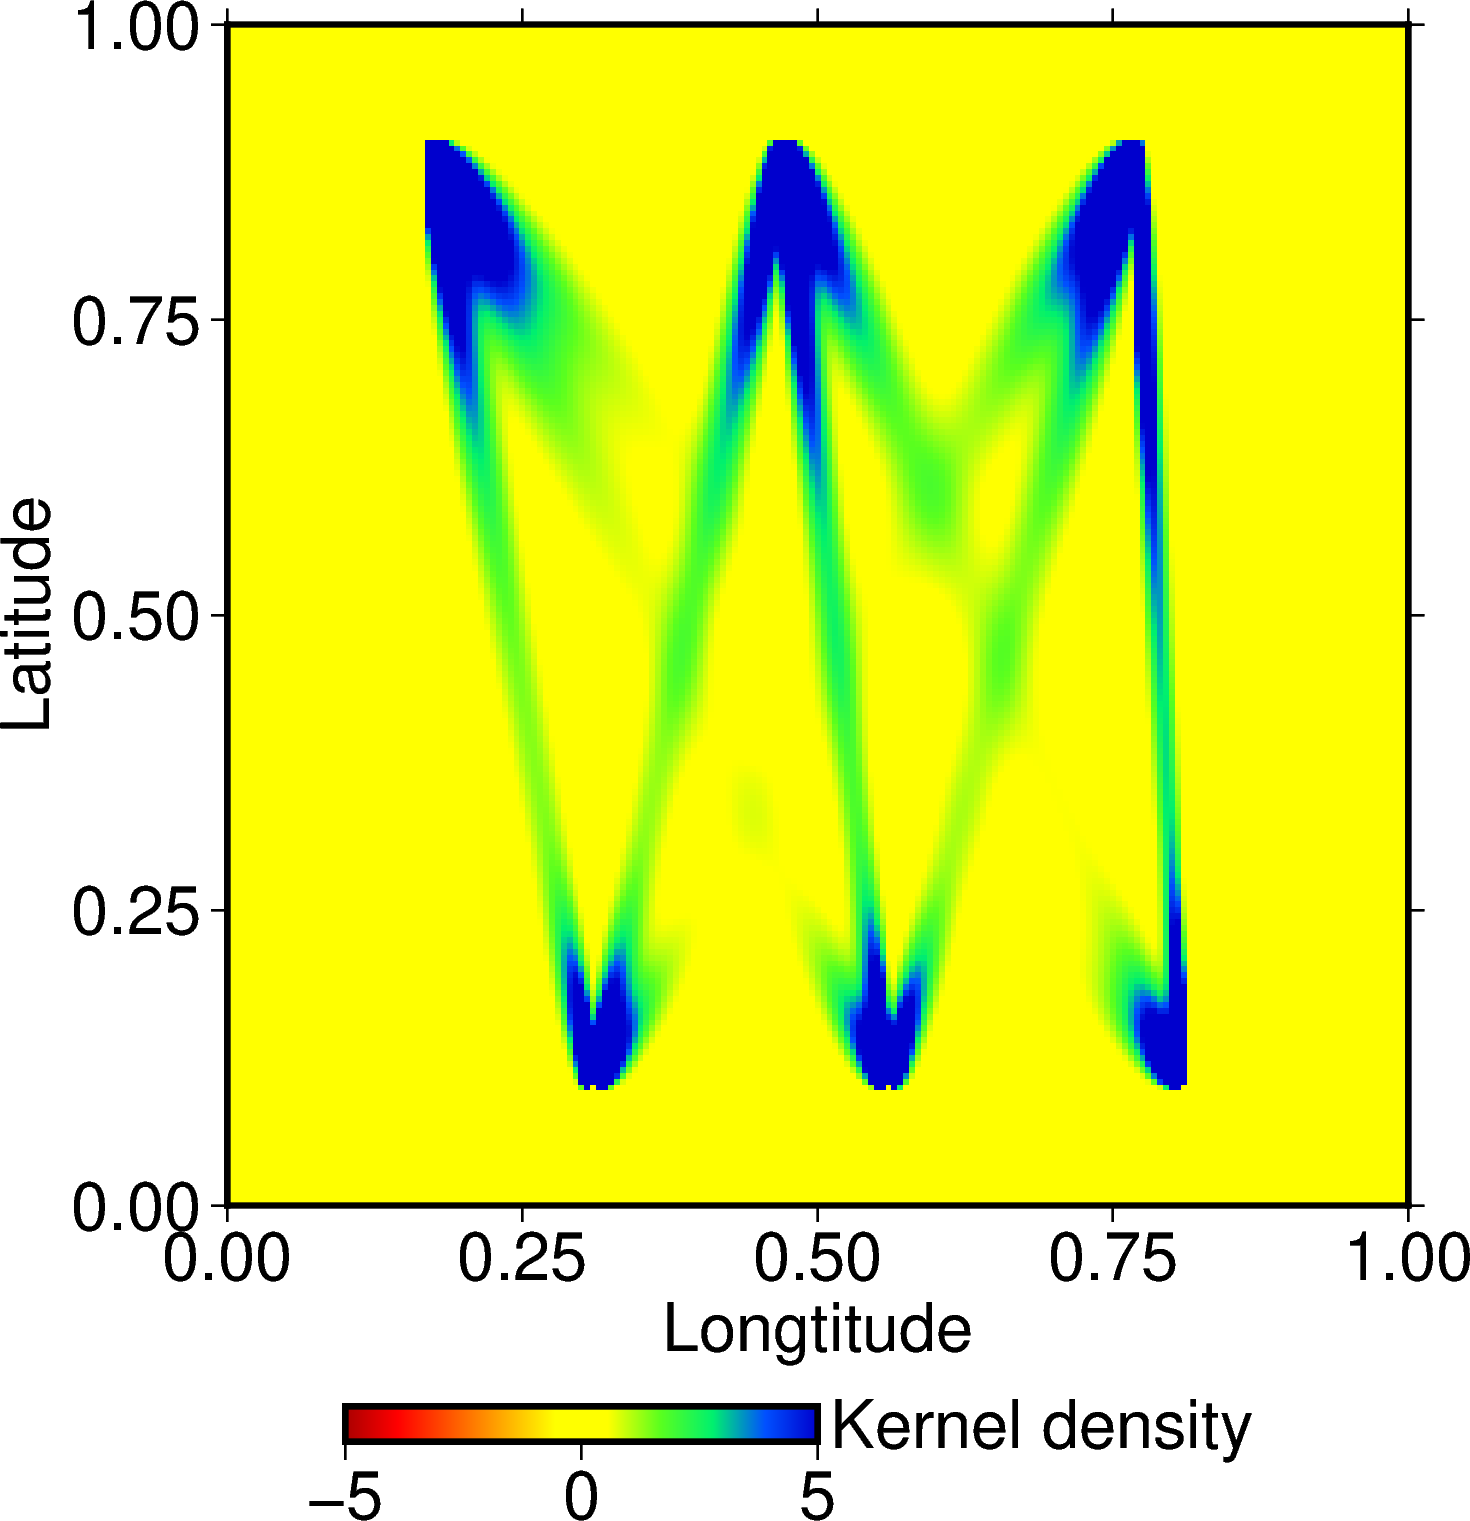

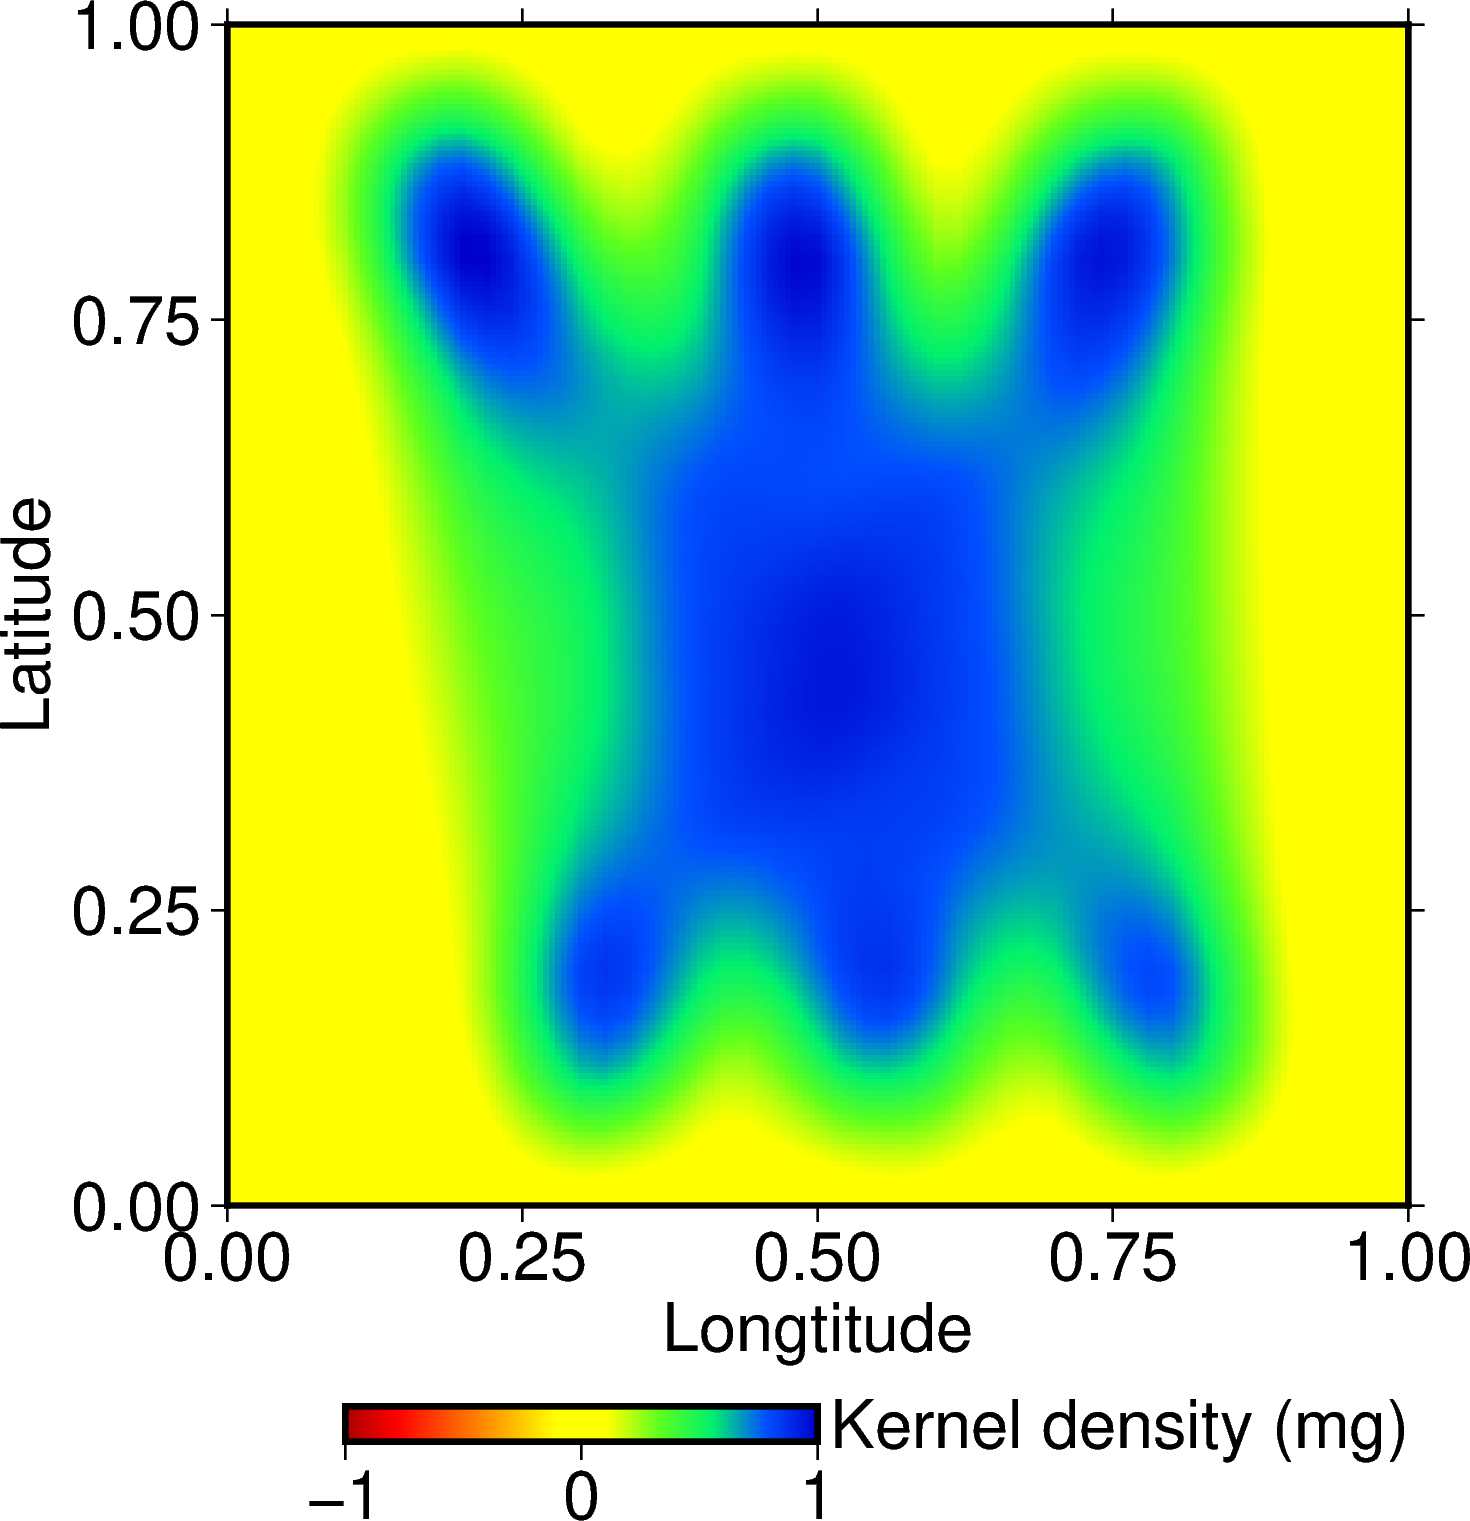

In [3]:
import sys
sys.path.append('../utils')
from functions_for_plot import plot_map

dx = 0.01; dy = 0.01

fname = 'img/5a_kernel_density.png'
fig = plot_map(lon,lat,Kden,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Kernel density",
            cpt_range = [-5, 5],)

fname = 'img/5b_kernel_density_mg.png'
fig = plot_map(lon,lat,Kden_mg,dx,dy,
            fname = fname, 
            x_label = "Longtitude",
            y_label = "Latitude",
            colorbar = "Kernel density (mg)",
            cpt_range = [-1, 1],)
